In [ ]:
!pip install tensorflow pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed


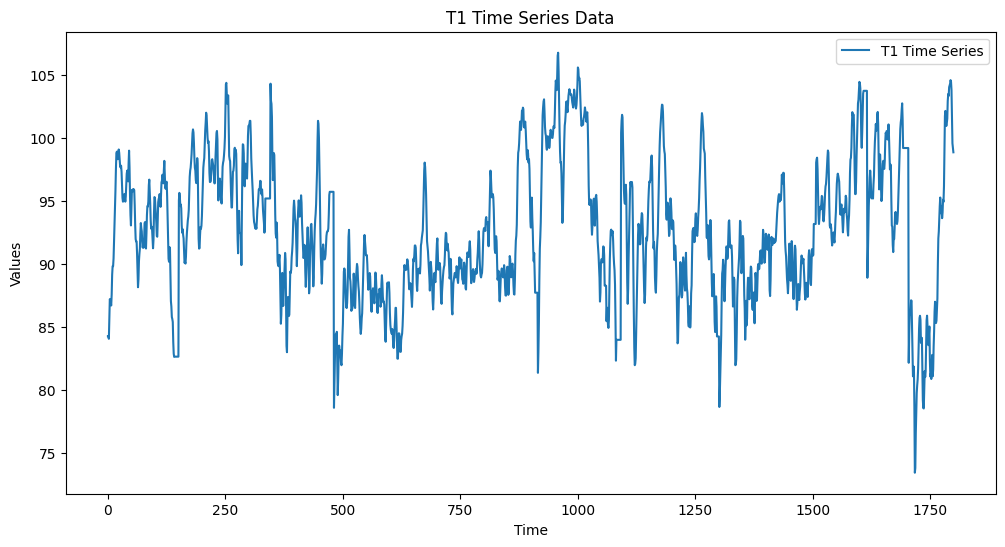

In [ ]:
# Load the dataset
file_path = '/content/heart_rate.csv'  # Replace with your file path in Colab
heart_rate_data = pd.read_csv(file_path)

# Use the T1 column for anomaly detection
data = heart_rate_data['T1']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='T1 Time Series')
plt.title("T1 Time Series Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences for LSTM input
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

sequence_length = 50
sequences = create_sequences(data, sequence_length)

# Split into train and test sets
train_size = int(len(sequences) * 0.8)
X_train = sequences[:train_size]
X_test = sequences[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
input_dim = X_train.shape[1]

# Define the LSTM Autoencoder
inputs = Input(shape=(sequence_length, 1))
encoded = LSTM(64, activation='relu', return_sequences=True)(inputs)
encoded = LSTM(32, activation='relu', return_sequences=False)(encoded)

decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 50, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.2272 - val_loss: 0.0349
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0375 - val_loss: 0.0248
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0264 - val_loss: 0.0188
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0199 - val_loss: 0.0164
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0122 - val_loss: 0.0127
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0118 - val_loss: 0.0125
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0114 - val_loss: 0.0124
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0113 - val_loss: 0.0125
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss:

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


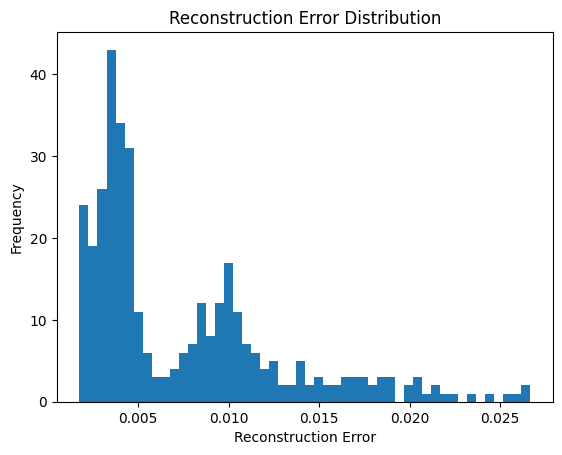

Anomaly Detection Threshold: 0.01885501725319497


In [ ]:
# Predict on test data
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=(1, 2))

# Plot reconstruction error
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.show()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)
print(f"Anomaly Detection Threshold: {threshold}")


Detected Anomalies at indices: [258 259 260 261 297 298 299 300 331 332 333 334 335 336 337 338 339 340]


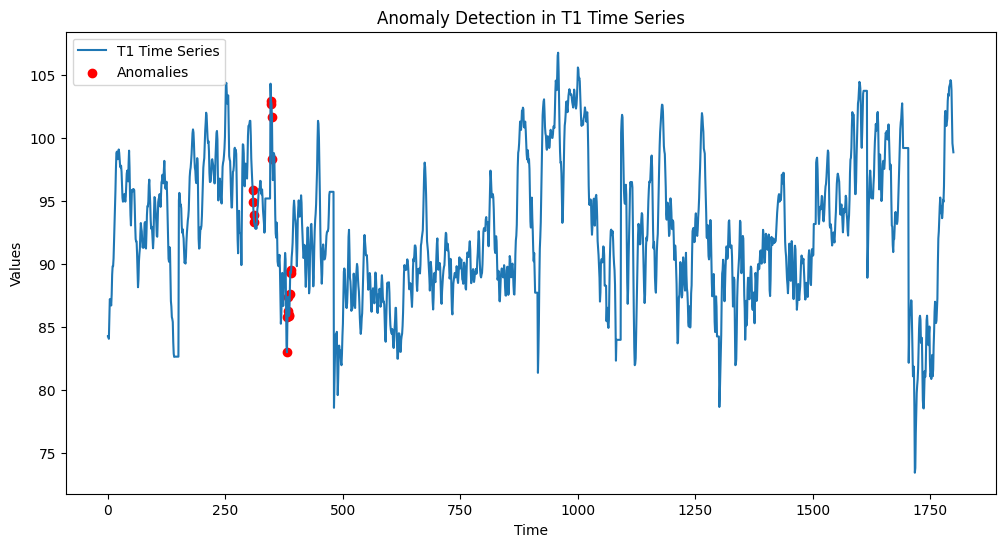

In [ ]:
# Identify anomalies
anomalies = mse > threshold
anomaly_indices = np.where(anomalies)[0]

print(f"Detected Anomalies at indices: {anomaly_indices}")

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data), label='T1 Time Series')
plt.scatter(anomaly_indices + sequence_length,
            scaler.inverse_transform(data)[anomaly_indices + sequence_length],
            color='red', label='Anomalies')
plt.title("Anomaly Detection in T1 Time Series")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[332   0]
 [  0  18]]


In [ ]:
# Precision, Recall, F1-Score
precision = precision_score(true_labels, predicted_labels) * 100
recall = recall_score(true_labels, predicted_labels) * 100
f1 = f1_score(true_labels, predicted_labels) * 100

print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")


Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%


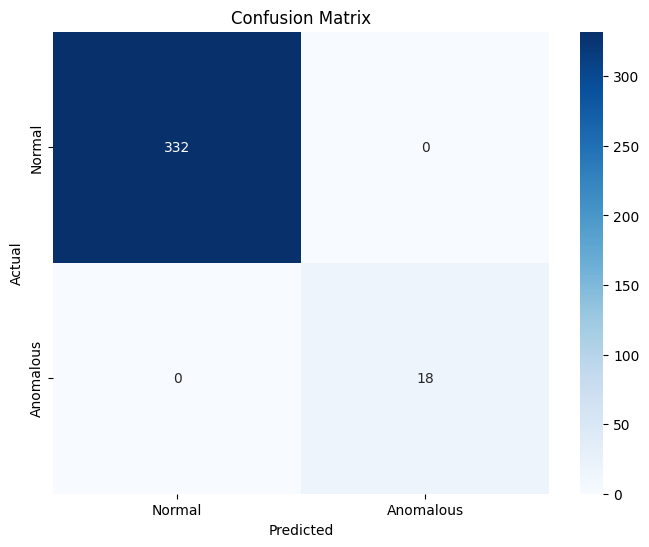

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
